# Embedded ML Lab - Excercise 0 - Intro Pytorch

* Documentation Pytorch: https://pytorch.org/docs/stable/index.html
* Documentation Matplotlib: https://matplotlib.org/stable/contents.html

### Tensor basics
`PyTorch` uses _pytorch_ _tensors_ to store N-dimensional data similar to NumPy or Matlab. Torch tensors support a variety of matrix or vector operations.

In [1]:
import torch
torch.rand(1).to('cuda') #initialize cuda context (might take a while)
x = torch.tensor([5,3]) #create variable
y = torch.tensor([3,3])

z = x * y #point-wise multiplication of two variables 
print(z)

tensor([15,  9])


Also, there are several methods to initialize tensors like `torch.ones / torch.zeros / torch.randn`   
We can get the shape of a tensor by calling `size` on a tensor

In [2]:
ones = torch.ones((10,10,5)) # creates a 3-dimensional tensor with ones with size [10,10,5]
rand = torch.randn((4,4)) # creates an 2-dimensional random tensor with size [4,4]

print(ones.size()) # returns a python list with dimension

torch.Size([10, 10, 5])


Pytorch tensors can also have different datatypes

In [3]:
torch.ones((10,10), dtype=torch.int) #inits a tensor with ones as int
torch.ones((10,10), dtype=torch.float) #inits a tensor with ones as float (standard)

tensor([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]])

Similar to NumPy or Matlab we can also slice tensors with indices (NumPy Indexing: https://numpy.org/doc/stable/reference/arrays.indexing.html)   
Slicing is equivalent to a torch.view. As the name suggests, this does not change the underlying storage or create a copy, meaning if we change the data, all associated views also show the changes.

In [4]:
ones = torch.ones((10,10,5)) # creates a 3-dimensional tensor with ones with size [10,10,5]
a = ones[0:5,0,0] # we create a view by slicing out index 0,1,2,3,4 from the first dimension and use : to slice all indices for dimension 2 and 3
print(f"Size of a: {a.size()}")

ones[0:5,:,:] = 3.14 
print(a)
b = ones.clone()[0:5,0,0] #cloning a tensor creates an independent copy
ones[0:5,:,:] = 7.11
print(b)
print(a)

Size of a: torch.Size([5])
tensor([3.1400, 3.1400, 3.1400, 3.1400, 3.1400])
tensor([3.1400, 3.1400, 3.1400, 3.1400, 3.1400])
tensor([7.1100, 7.1100, 7.1100, 7.1100, 7.1100])


Other usefull tensor operations are `flatten()`, `sum()`, `max()`, `min()`.

In [5]:
a = torch.ones((10,10,10))
a_flattened = a.flatten()
print(f"Shape of a: {a.size()}, Shape of a_flattened: {a_flattened.size()}")
sum_of_a = a.sum(dim=(0,1)) # sum of dimens 0 and 1 
print(f"Sum: {sum_of_a}")
sum_of_a = a.sum(dim=(0,1,2)) #sum_of_all_entries
print(f"Sum: {sum_of_a}")

Shape of a: torch.Size([10, 10, 10]), Shape of a_flattened: torch.Size([1000])
Sum: tensor([100., 100., 100., 100., 100., 100., 100., 100., 100., 100.])
Sum: 1000.0


A very special property of pytorch tensors is that they can be pushed to a device (a GPU) and operations can be done on a GPU. This can speedup operations dramatically, if the required operations are parallelizable.    
We therefore first check if pytorch can reach the Jetsons' GPU.

In [6]:
import time
print(f'CUDA available:        {["no", "yes"][torch.cuda.is_available()]}')

a = torch.zeros((10**4, 10**4))
b = torch.zeros((10**4, 10**4))

def f(device, n, k):
    x = torch.randn(n, n, dtype=torch.float32, device=device)
    for _ in range(k):
        x = torch.matmul(x, x)
        x = (x - x.mean()) / x.std()
    return x.max()

n = 256
k = 100

%timeit -n 1 -r 1 print(f('cpu',  n, k))
%timeit -n 1 -r 1 print(f('cuda', n, k))
%timeit -n 1 -r 1 print(f('cpu',  4*n, k))
%timeit -n 1 -r 1 print(f('cuda', 4*n, k))

CUDA available:        yes
tensor(nan)
2.81 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
tensor(9.1357, device='cuda:0')
14 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
tensor(nan)
14.2 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)
tensor(8.6432, device='cuda:0')
2.72 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


PyTorch tensors (data/nn-weights) can also be stored and loaded from disk.   
We load a sample from the MNIST dataset, which is stored as "mnist_sample.pt" on the disk.
The MNIST Dataset consists of images of handwritten grayscale images with digits from `0-9`
* This can be done by using `torch.load("filename")`. Similarly, we can store tensors`toch.store(tensor, "filename")`.

In [7]:
mnist_sample = torch.load("mnist_sample.pt") #this loads a 28 by 28 pixel image from the MNSIT dataset
print(mnist_sample.size())

torch.Size([28, 28])


In [13]:
%pip install pillow

     |████████████████████████████████| 4.3 MB 7.0 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


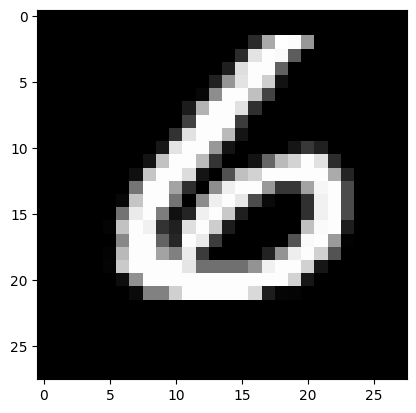

In [8]:
import matplotlib.pyplot as plt
plt.imshow(mnist_sample[:,:], cmap='gray', interpolation='none')

### Pytorch Modules

PyTorch modules are the base classes of neural networks in PyTorch. All modules we define should inherit from `torch.nn.Module`. Modules can also contain other Modules, allowing nesting.    
A tensor can be defined as a `Parameter` of a module.
Every module has a forward path defined. We add the paramter to our input and return the sum.

In [9]:
import torch.nn as nn

class AddConstant(nn.Module):
    def __init__(self):
        super(AddConstant, self).__init__()
        self.add_value = nn.parameter.Parameter(torch.tensor(5), requires_grad=False)
        
    def forward(self, x):
        y = x + self.add_value
        return y
    
addc = AddConstant() #we create a new addValue istance

Our AddValue module has several inherited functionality
* The forward pass can be called by either using the call function `addv(5)` or by directly calling the forward function `addv.forward(5)`.

In [10]:
y = addc(5)
y = addc.forward(5)
print(f"Result: {y}")
print(list(addc.named_parameters()))

Result: 10
[('add_value', Parameter containing:
tensor(5))]


We can load and set so-called 'state_dicts' from modules, containing all parameters (a.k.a NN weights).


In [11]:
state_dict = addc.state_dict()
print(state_dict)
state_dict['add_value'] = torch.tensor(4)
addc.load_state_dict(state_dict)
print(f"Result: {addc.forward(5)}")

OrderedDict([('add_value', tensor(5))])
Result: 9


Modules can also be pushed to the GPU for calculation.

In [12]:
addc.to('cpu')
y = addc(torch.tensor(5, device='cpu'))

Functions that do not have parameters can be found in `torch.nn.functional`.

In [13]:
import torch.nn.functional as F

result = F.relu(torch.ones(1))
result = F.max_pool2d(torch.ones((10,10,10)), kernel_size=2)